In [3]:
import py21cmfast as p21c
from py21cmfast import plotting
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

#coeval = p21c.run_coeval(
#     redshift=8.0,
#     user_params={'HII_DIM': 100, "USE_INTERPOLATION_TABLES": False}
# )

#p21c.plotting.coeval_sliceplot(coeval, kind='brightness_temp')


/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [4]:
lightcone = p21c.run_lightcone(
    redshift = 6.0,
    max_redshift = 12.0,
    user_params = {"HII_DIM":128, "BOX_LEN": 600},
    lightcone_quantities=("brightness_temp", 'density'),
    global_quantities=("brightness_temp", 'density', 'xH_box'),
    direc='_cache'
)

/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/inputs.py:491: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/student2/opt/anaconda3/envs/Project/lib/python3.9/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array 

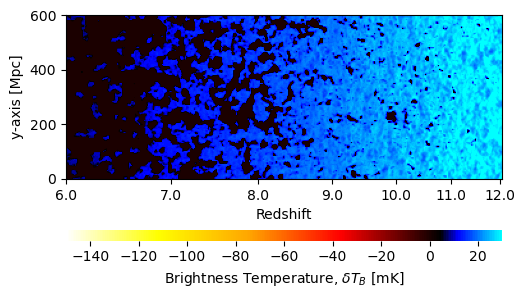

In [5]:
plotting.lightcone_sliceplot(lightcone);

In [6]:
print(lightcone.shape)

(128, 128, 342)


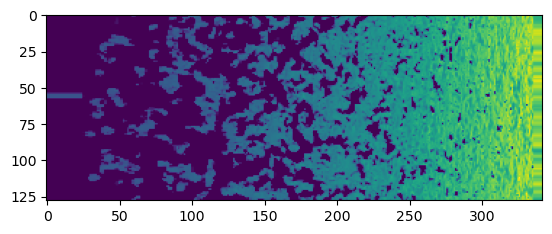

In [53]:
cone = lightcone.brightness_temp
n_steps = 342
dims =128
z = np.linspace(6.0,12.0,n_steps)

lc = np.zeros((dims,dims,n_steps))
dt =0.3 #Mhz


for i in range(342):
    freq = 210 - (dt*i)
    zlc = (1420/freq) -1
    index = np.abs(z - zlc).argmin()
    lc[:,:,i] = cone[:,:,index]
    
plt.imshow(lc[30,:,:])
    
    

In [54]:
dir = './Boxes/'
fname = 'test'
fits.writeto(dir+fname+'.fits',np.transpose(lc,(2,0,1)),overwrite=True)